In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import streamlit as st
from PIL import Image
import matplotlib.pyplot as plt
from scipy.stats import linregress
plt.style.use('fivethirtyeight')
import yfinance as yf
st.set_option('deprecation.showPyplotGlobalUse', False)

In [2]:
st.write('''
# STOCK & CRYPTO ANALYZER

**TAGHIPOUR**

''')
img= Image.open('C:/Users/moham/OneDrive/دسکتاپ/python-stock/1.jpg')
st.image(img,width=600)


2024-01-07 13:57:05.101 
  command:

    streamlit run O:\anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [3]:
st.sidebar.header('INSERT DATA')
def data():
    n=st.sidebar.text_input('How many days you wanna predict? ',5)
    symbol=st.sidebar.selectbox('Select The Symbol : ',['BTC-USD','XRP-USD','BCH-USD','USDT-USD','XEM-USD','ADA-USD','XTZ-USD','XMR-USD','LINK-USD','XLM-USD','BNB-USD','TRX-USD','LTC-USD','AMZN','ETH-USD','TSLA'])
    mydate = st.sidebar.selectbox('Select The start date : ' ,['2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01'] )
    return mydate , n , symbol


In [4]:
mydate , n , symbol = data()

In [5]:
def get_data():
    df = yf.Ticker(symbol)
    df = df.history(period='1d' , start= mydate )
    df['Date'] = df.index
    df = df.set_index(pd.DatetimeIndex(df['Date'].values))
    return df

In [6]:
def get_company_name(symbol):
    if symbol=='BTC-USD':
        return 'BITCOIN'
    elif symbol== 'ETH-USD':
        return 'ETHEREUM'
    elif symbol== 'LTC-USD':
        return 'LITECOINE'
    elif symbol== 'AMZN':
        return 'AMAZON'
    elif symbol=='TSLA':
        return 'TESLA'
    elif symbol=='TRX-USD':
        return 'TRON'
    elif symbol=='XRP-USD':
        return 'XRP'
    else :
        return  'NONE'



In [7]:
df=get_data()
company=get_company_name(symbol)
st.header(company + 'Close Price\n')
st.line_chart(df['Close'])
st.header(company + 'Volume\n')
st.line_chart(df['Volume'])
st.header('Stock Datas')
st.write(df.describe())

In [9]:
df=df[['Close']]
forecast=int(n)
df['Prediction']=df[['Close']].shift(-forecast)
x= np.array(df.drop(['Prediction'],axis=1))
x= x[:-forecast]
y= np.array(df['Prediction'])
y=y[:-forecast]

In [10]:
crypto = get_data()
st.header('Current Price')
st.warning(crypto.tail(1).Close)

DeltaGenerator()

In [11]:
xtrain , xtest , ytrain , ytest=train_test_split(x,y,test_size=0.2)
mysvr=SVR(kernel='rbf',C=1000,gamma=0.1)
mysvr.fit(xtrain,ytrain)
svmconf=mysvr.score(xtest,ytest)
st.header('SVM Accuracy')
st.success(svmconf)


DeltaGenerator()

In [13]:
x_forecast=np.array(df.drop(['Prediction'],axis=1))[-forecast:]
svmpred=mysvr.predict(x_forecast)
st.header('SVM Prediction')
st.success(svmpred)

DeltaGenerator()

In [14]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lrconf=lr.score(xtest,ytest)
st.header('LR Accuracy')
st.success(lrconf)

DeltaGenerator()

In [15]:
lrpred=lr.predict(x_forecast)
st.header('LR Prediction')
st.success(lrpred)
lrpred

array([42837.13094212, 44164.16559063, 44146.99607975, 43974.11377969,
       43968.37633715])

In [16]:
data=crypto
data=data.tail(90)
data0 = data.copy()
data0['date_id'] = ((data0.index.date - data0.index.date.min())).astype('timedelta64[D]')
data0['date_id'] = data0['date_id'].dt.days + 1
data1 = data0.copy()

In [17]:
while len(data1)>3:

    reg = linregress(
                    x=data1['date_id'],
                    y=data1['High'],
                    )
    data1 = data1.loc[data1['High'] > reg[0] * data1['date_id'] + reg[1]]

reg = linregress(
                    x=data1['date_id'],
                    y=data1['High'],
                    )

data0['high_trend'] = reg[0] * data0['date_id'] + reg[1]

data1 = data0.copy()

while len(data1)>3:

    reg = linregress(
                    x=data1['date_id'],
                    y=data1['Low'],
                    )
    data1 = data1.loc[data1['Low'] < reg[0] * data1['date_id'] + reg[1]]

reg = linregress(
                    x=data1['date_id'],
                    y=data1['Low'],
                    )

data0['low_trend'] = reg[0] * data0['date_id'] + reg[1]


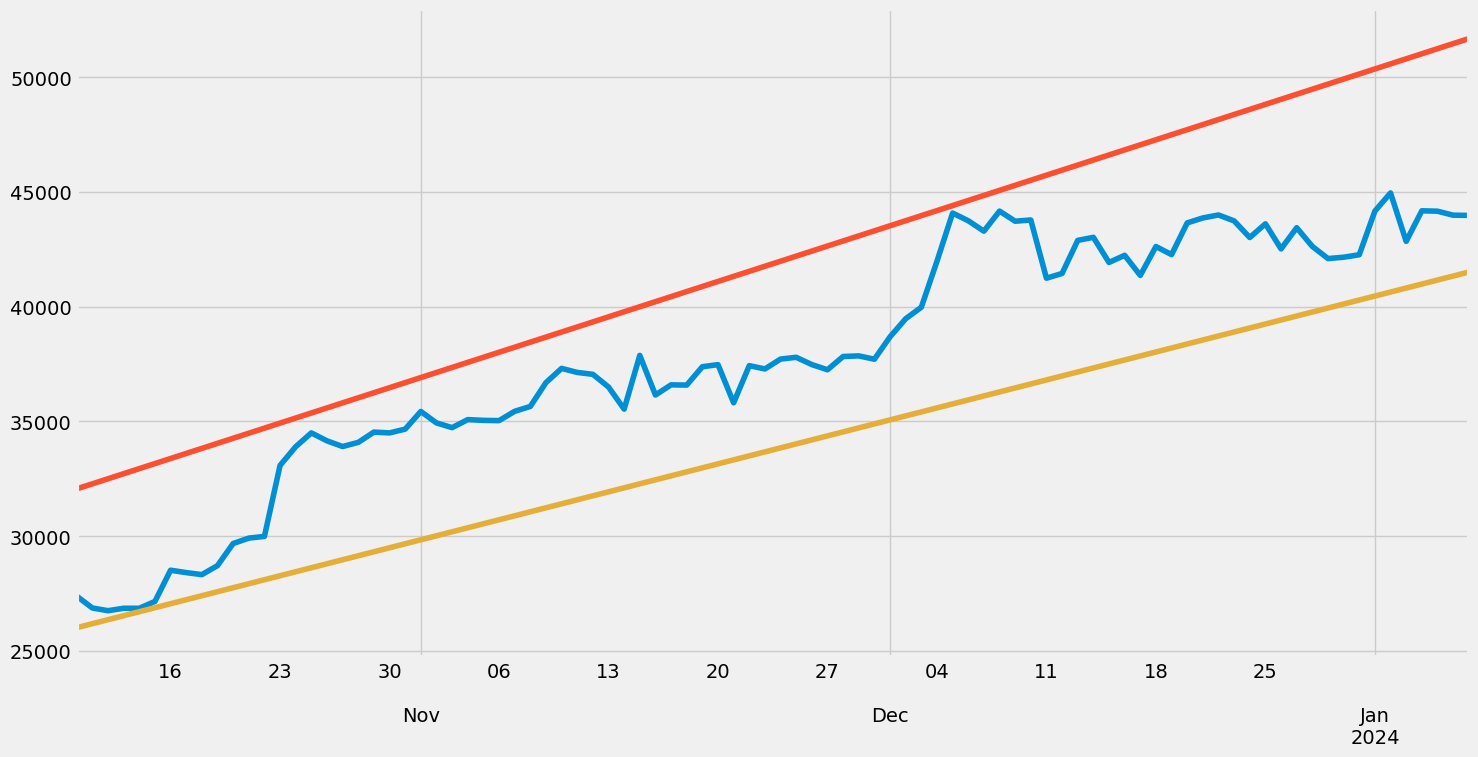

In [18]:
plt.figure(figsize=(16,8))
data0['Close'].plot()
data0['high_trend'].plot()
data0['low_trend'].plot()
# plt.savefig('trendline.png')
plt.show()

In [19]:
st.header('TRENDLINE : ')
# imag=Image.open('C:/Users/Asus/Python Anaconda Projecs/All Test/predictor/trendline.png')
# st.image(imag,width=600)
st.pyplot()

DeltaGenerator()

<Figure size 640x480 with 0 Axes>

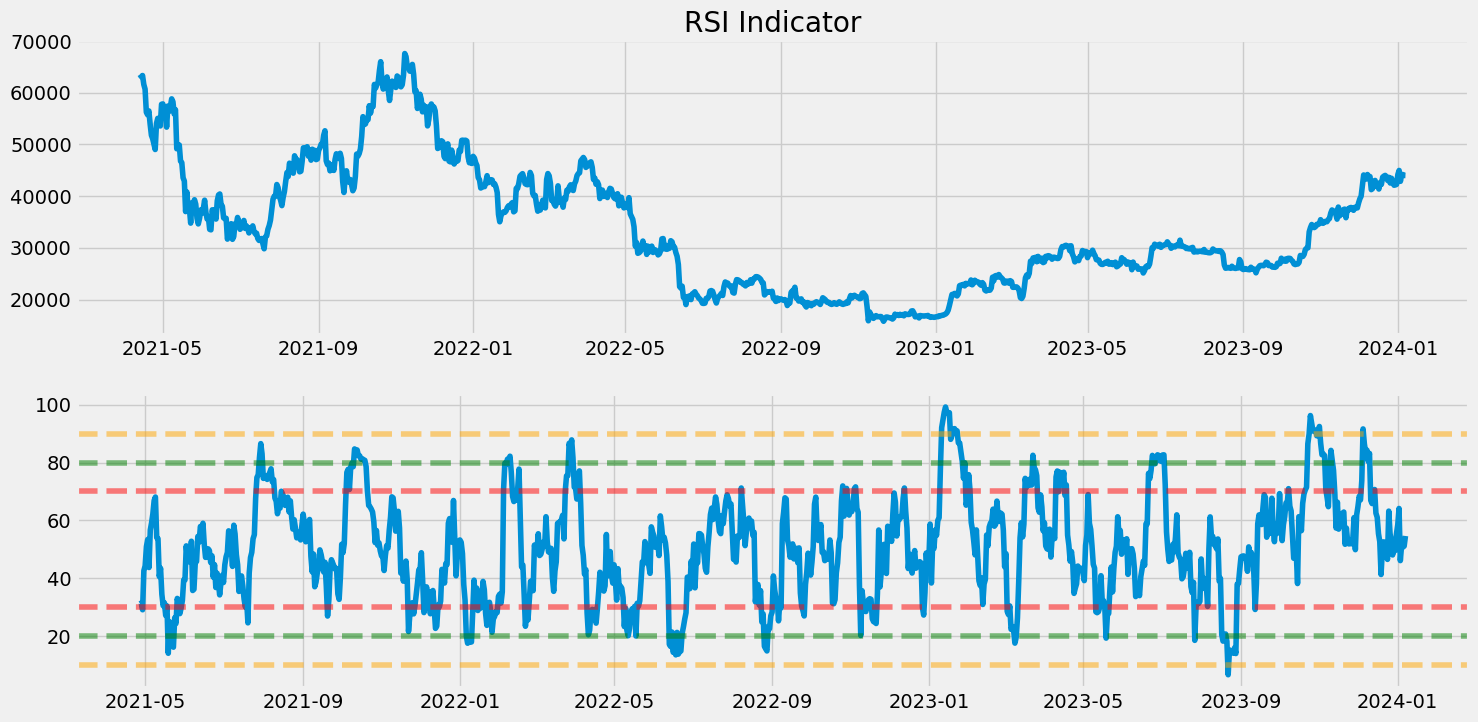

In [20]:
df = crypto
df=df.tail(1000)
delta=df['Close'].diff(1)
delta.dropna()
up=delta.copy()
down=delta.copy()
up[up<0]=0
down[down>0]=0
period=14
avg_gain=up.rolling(window=period).mean()
avg_loss=abs(down.rolling(window=period).mean())
RS = avg_gain/avg_loss
RSI = 100.0 - (100.0/(1.0+RS))
newdf=pd.DataFrame()
newdf['Close']=df['Close']
newdf['RSI']=RSI
fig , (ax1 , ax2)=plt.subplots(nrows=2 , ncols=1 , figsize=(16,8))
ax1.plot(newdf['Close'],label='Close Price')
ax2.plot(newdf['RSI'],label='RSI')
ax2.axhline(10 , linestyle='--',color='orange',alpha=0.5)
ax2.axhline(20 , linestyle='--',color='green',alpha=0.5)
ax2.axhline(30 , linestyle='--',color='red',alpha=0.5)
ax2.axhline(70 , linestyle='--',color='red',alpha=0.5)
ax2.axhline(80 , linestyle='--',color='green',alpha=0.5)
ax2.axhline(90 , linestyle='--',color='orange',alpha=0.5)
ax1.set_title('RSI Indicator')
# plt.savefig('RSI.png')
plt.show()

In [21]:
st.header('RSI : ')
# imag=Image.open('C:/Users/Asus/Python Anaconda Projecs/All Test/predictor/RSI.png')
# st.image(imag,width=600)
st.pyplot()

DeltaGenerator()

In [22]:
df= crypto
df=df.tail(1000)
typical_price=(df['Close']+df['High']+df['Low'])/3
period=14
money_flow=typical_price*df['Volume']
positive_flow=[]
negative_flow=[]

In [23]:
for i in range(1,len(typical_price)):
    if typical_price[i]>typical_price[i-1]:
        positive_flow.append(money_flow[i])
        negative_flow.append(0)
    elif typical_price[i]<typical_price[i-1]:
        positive_flow.append(0)
        negative_flow.append(money_flow[i])
        
    else :
        positive_flow.append(0)
        negative_flow.append(0)
        
positive_mf=[]
negative_mf=[]

for i in range(period-1,len(positive_flow)):
    positive_mf.append(sum(positive_flow[i+1-period:i+1]))
                       
for i in range(period-1,len(negative_flow)):
    negative_mf.append(sum(negative_flow[i+1-period:i+1])) 
    
    
mfi=100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf) ) )

df2=pd.DataFrame()
df2['MFI']=mfi

fig , (ax1 , ax2)=plt.subplots(nrows=2,ncols=1,figsize=(16,8))
ax1.plot(df['Close'],label='Close Price')
ax2.plot(df2['MFI'],label='MFI')
ax2.axhline(20,linestyle='--',color="r",alpha=0.5)
ax2.axhline(30,linestyle='--',color="b",alpha=0.5)
ax2.axhline(70,linestyle='--',color="b",alpha=0.5)
ax2.axhline(80,linestyle='--',color="r",alpha=0.5)
ax1.set_title('MFI Visualizer')
# plt.savefig('MFI.png')


Text(0.5, 1.0, 'MFI Visualizer')

In [24]:
st.header('MFI : ')
# imag=Image.open('C:/Users/Asus/Python Anaconda Projecs/All Test/predictor/MFI.png')
# st.image(imag,width=600)
st.pyplot()

DeltaGenerator()

In [25]:
df= crypto
apple = df
ma30=pd.DataFrame()
ma30['AM']=apple['Close'].rolling(window=30).mean()
ma100=pd.DataFrame()
ma100['AM']=apple['Close'].rolling(window=100).mean()


In [26]:
data=pd.DataFrame()
data['AAPL']=apple['Close']
data['MA30']=ma30['AM']
data['MA100']=ma100['AM']

In [27]:
def signal(data) : 
    signalBuy=[]
    signalSell=[]
    f=-1
    for i in range(len(data)):
        if data['MA30'][i]>data['MA100'][i]:
            if f!=1:
                signalBuy.append(data['AAPL'][i])
                signalSell.append(np.nan)
                f=1
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['MA30'][i]<data['MA100'][i]: 
            if f!=0:
                signalBuy.append(np.nan)
                signalSell.append(data['AAPL'][i])
                f=0
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan) 

    return (signalBuy , signalSell )          


In [28]:
buy_sell = signal(data)
data['buy signal']=buy_sell[0]
data['sell signal']=buy_sell[1]


<Figure size 640x480 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

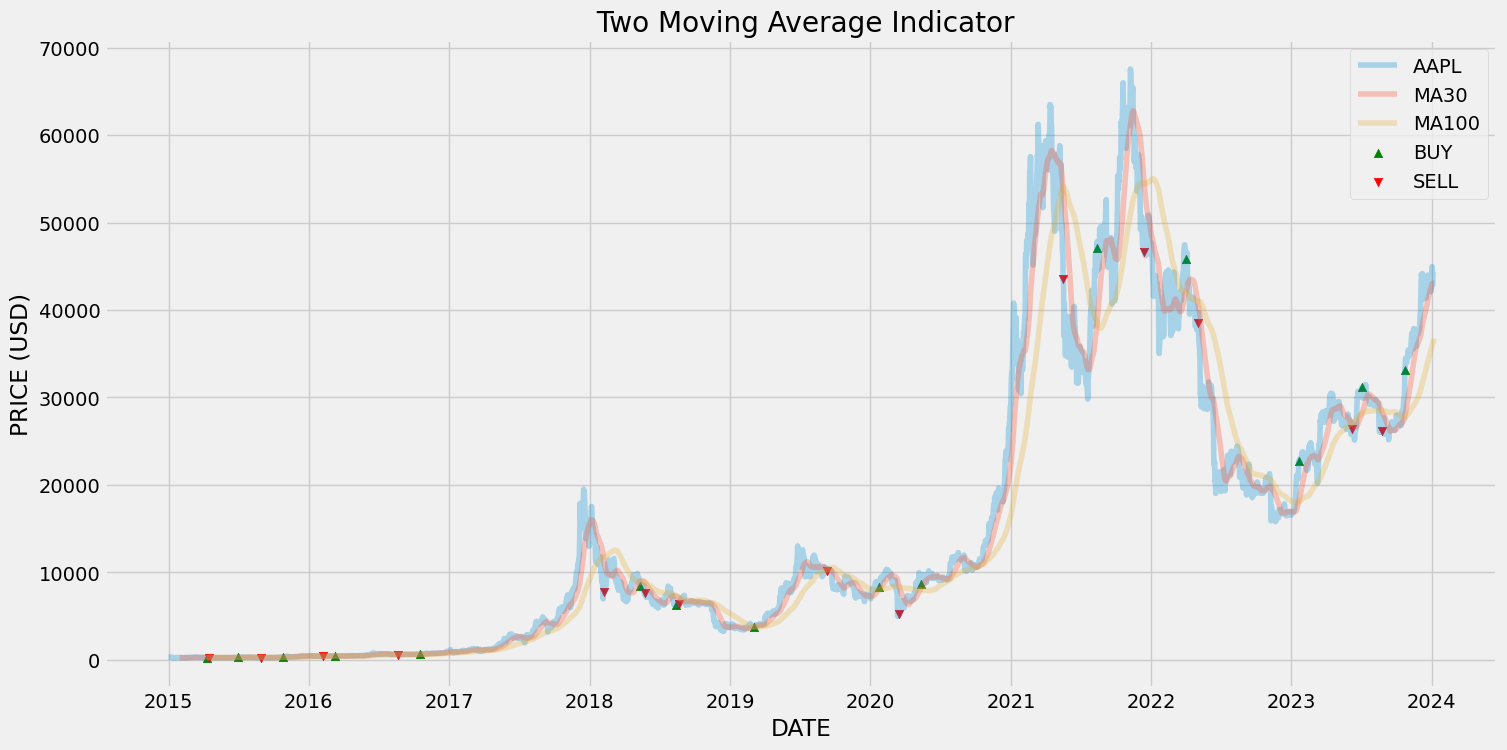

In [29]:
plt.figure(figsize=(16,8))
plt.plot(data['AAPL'],label='AAPL',alpha=0.3)
plt.plot(data['MA30'],label='MA30',alpha=0.3)
plt.plot(data['MA100'],label="MA100",alpha=0.3)
plt.scatter(data.index,data['buy signal'],label='BUY',marker='^',color='g')
plt.scatter(data.index,data['sell signal'],label='SELL',marker='v',color='r')
plt.title(' Two Moving Average Indicator') 
plt.xlabel('DATE')
plt.ylabel('PRICE (USD)')
plt.legend()
# plt.savefig('SMA.png')
plt.show()         


In [30]:
st.header('SMA : ')
# imag=Image.open('C:/Users/Asus/Python Anaconda Projecs/All Test/predictor/SMA.png')
# st.image(imag,width=600)
st.pyplot()


DeltaGenerator()

In [31]:
df = crypto
df=df.tail(220)
shortEMA =df.Close.ewm(span=12 , adjust=False).mean()
longEMA =df.Close.ewm(span=26 , adjust=False).mean()
MACD = shortEMA - longEMA
signal = MACD.ewm(span=9 , adjust = False).mean()


<Figure size 640x480 with 0 Axes>

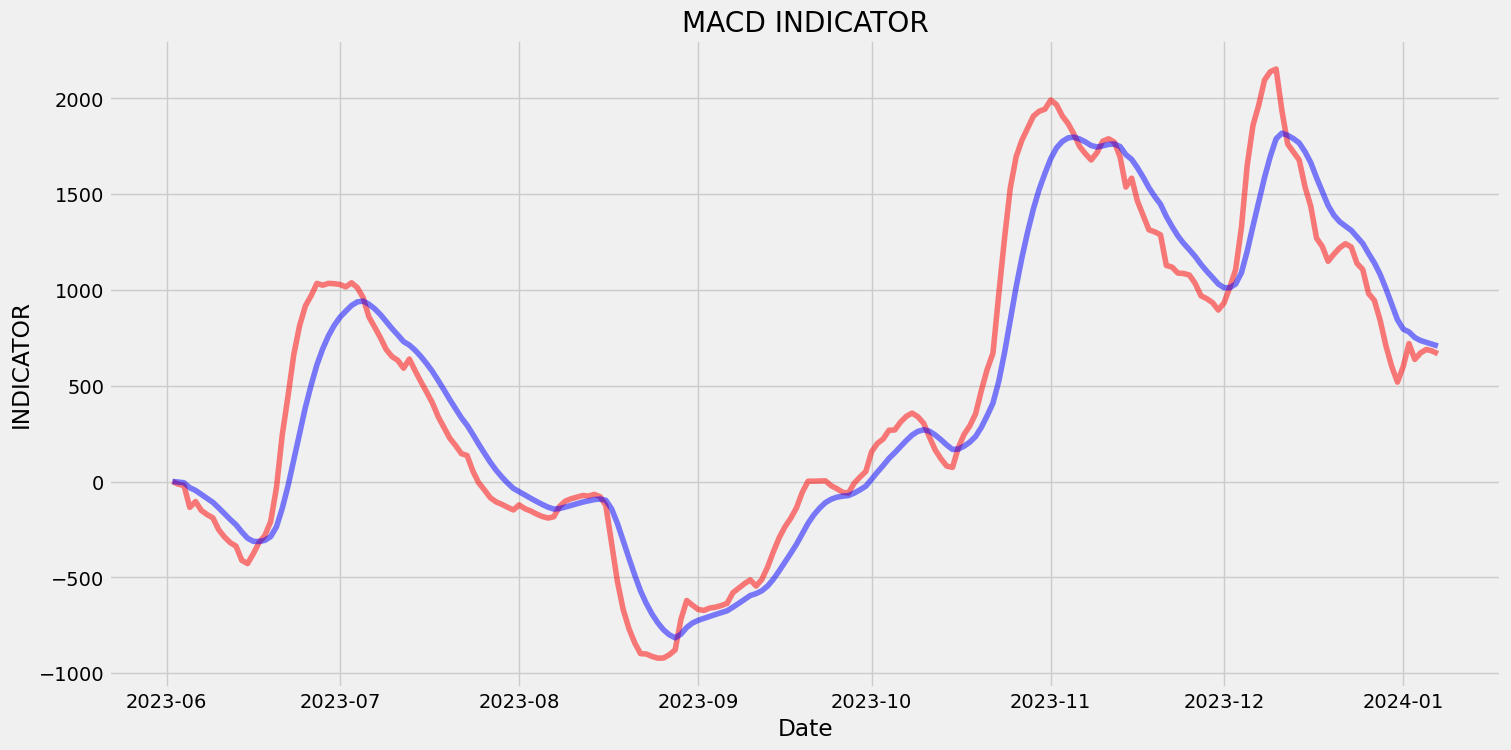

DeltaGenerator()

In [32]:
plt.figure(figsize=(16,8))
plt.plot(df.index , MACD , label='MACD' , color='red' , alpha=0.5)
plt.plot(df.index , signal , label='Signal' , color='blue' , alpha=0.5)
plt.title('MACD INDICATOR')
plt.xlabel('Date')
plt.ylabel('INDICATOR')
# plt.savefig('MACD1.png')
plt.show()
st.header('MACD : ')
st.pyplot()


In [33]:
df['MACD']=MACD
df['signal line']=signal

C:\Users\moham\AppData\Local\Temp\ipykernel_1560\3773117465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MACD']=MACD
C:\Users\moham\AppData\Local\Temp\ipykernel_1560\3773117465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal line']=signal


In [34]:
def buy_sell(signal):
    buy=[]
    sell=[]
    f = -1
    for i in range(0 , len(signal)):
        if signal['MACD'][i] > signal['signal line'][i]:
            sell.append(np.nan)
            if f != 1:
                buy.append(signal['Close'][i])
                f=1
            else:
                buy.append(np.nan)
        elif signal['MACD'][i] < signal['signal line'][i]:
            buy.append(np.nan)
            if f != 0:
                sell.append(signal['Close'][i])
                f=0
            else:
                sell.append(np.nan) 
                
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            
    return  buy , sell         


In [35]:
a = buy_sell(df)
df['Buy_Signal'] = a[0]
df['Sell_Signal'] = a[1]

C:\Users\moham\AppData\Local\Temp\ipykernel_1560\2074940802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Buy_Signal'] = a[0]
C:\Users\moham\AppData\Local\Temp\ipykernel_1560\2074940802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sell_Signal'] = a[1]


<Figure size 640x480 with 0 Axes>

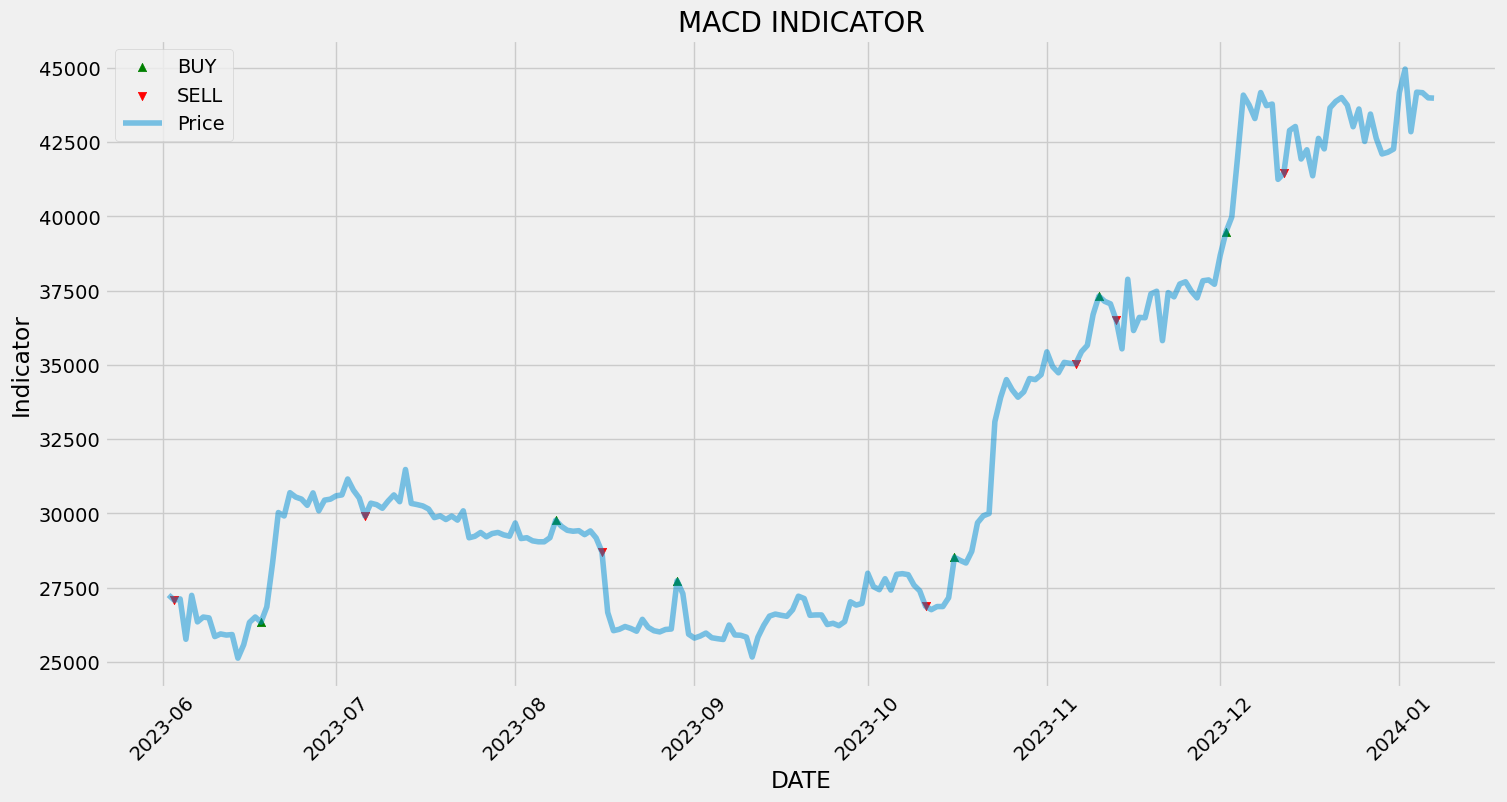

DeltaGenerator()

In [36]:
plt.figure(figsize=(16,8))
plt.scatter(df.index , df['Buy_Signal'] , color='green', label='BUY' , marker='^')
plt.scatter(df.index , df['Sell_Signal'] , color='red', label='SELL' , marker='v')
plt.plot(df['Close'],label='Price',alpha = 0.5)
plt.title('MACD INDICATOR')
plt.xlabel('DATE')
plt.ylabel('Indicator')
plt.xticks(rotation=45)
plt.legend()
# plt.savefig('MACD2.png')
plt.show()
st.pyplot()


In [37]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
plt.style.use('fivethirtyeight')


In [38]:
df = crypto


data=df.filter(['Close'])
dataset=data.values



training_data_len=math.ceil(len(dataset)*0.8)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [39]:
training_data=scaled_data[0:training_data_len , :]


In [40]:
xtrain=[]
ytrain=[]
n = 60

In [41]:
for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , 0])
    ytrain.append(training_data[i,0])


In [42]:
xtrain , ytrain = np.array(xtrain) , np.array(ytrain)
xtrain=np.reshape(xtrain , (xtrain.shape[0],xtrain.shape[1],1))

In [43]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [44]:
model.compile(loss='mean_squared_error',optimizer='adam')


In [45]:
model.fit(xtrain,ytrain,epochs=1,batch_size=1)



2576/2576 [==============================] - 99s 36ms/step - loss: 0.0015


In [46]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len : , :]
for i in range(n , len(test_data)):
    xtest.append(test_data[i-n : i , 0])

In [47]:
xtest=np.array(xtest)
xtest=np.reshape(xtest , (xtest.shape[0],xtest.shape[1],1))

In [48]:
prediction=model.predict(xtest)
prediction=scaler.inverse_transform(prediction)
#root mean squared error
rmse=np.sqrt(np.mean((prediction - ytest)**2))

21/21 [==============================] - 1s 9ms/step


In [49]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction


C:\Users\moham\AppData\Local\Temp\ipykernel_1560\3255828823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


In [50]:
st.header('Deep Learning Method : ')
plt.figure(figsize=(16,8))
plt.title('Price Predictor Using DL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Value','Prediction'])
st.pyplot()
plt.show()


<Figure size 640x480 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

In [51]:
st.header('RMSE : ')
st.success(rmse)

DeltaGenerator()

In [52]:
newdf=data[-60:].values
scalednewdf=scaler.transform(newdf)

In [53]:
xtest=[]
xtest.append(scalednewdf)
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [54]:
pred=model.predict(xtest)
pred=scaler.inverse_transform(pred)
# print('Next Day Prediction:  ' , pred)

1/1 [==============================] - 0s 19ms/step


In [55]:
st.header('Deep Learning Prediction : ')
st.success(pred)

DeltaGenerator()